In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import urllib

# Display Data about All Wildfire Incidents in Indonesia
Gather information for all wildfire events in Sumatra

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [3]:
os.chdir("C:\\Users\\USER\\Documents\\DATA USER\\DATA D\\skripsi-uph\\wildfire-data-science")
wf_data  = pd.read_csv("data-total.csv")
wf_data.columns
# rename columns
wf_data.rename(
    columns={
        'Lat': 'lat', 
        'Long': 'long', 
        'Satellite': 'satellite', 
        'Time_UTC': 'time_utc', 
        'Date': 'date', 
        'Source': 'source', 
        'PROVINSI': 'provinsi',
        'KAB_KOTA': 'kab_kota'
        }, 
    inplace=True,
    )

# adding '-' to date column values
wf_data.date = pd.to_datetime(wf_data.date, format="%Y%m%d")
wf_data.date = wf_data.date.astype('string')

In [4]:
# All provinces in sumatera
sumatera_provinces = [
    'SUMATERA UTARA',
    'JAMBI',
    'RIAU',
    'SUMATERA BARAT',
    'SUMATERA SELATAN',
    'BENGKULU',
    'LAMPUNG',
    'ACEH'
]
# create filter so that only events in sumatera will be returned.
sumatera_filter = wf_data['provinsi'].apply(lambda x: x in sumatera_provinces) 
sumatera_only = wf_data.loc[sumatera_filter]

In [5]:
display(sumatera_only.info())
display(sumatera_only.provinsi.unique())
display(sumatera_only.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7839 entries, 1 to 39670
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        7839 non-null   float64
 1   long       7839 non-null   float64
 2   satellite  7839 non-null   object 
 3   time_utc   7839 non-null   object 
 4   date       7839 non-null   string 
 5   source     7839 non-null   object 
 6   provinsi   7839 non-null   object 
 7   kab_kota   7839 non-null   object 
 8   kec2006    7830 non-null   object 
 9   desaa2006  7830 non-null   object 
 10  nama_kaw   930 non-null    object 
dtypes: float64(2), object(8), string(1)
memory usage: 734.9+ KB


None

array(['LAMPUNG', 'RIAU', 'SUMATERA UTARA', 'SUMATERA BARAT',
       'SUMATERA SELATAN', 'ACEH', 'JAMBI', 'BENGKULU'], dtype=object)

,lat,long,satellite,time_utc,date,source,provinsi,kab_kota,kec2006,desaa2006,nama_kaw
1,-5.06259,105.101,LPN-NPP,06:11:04 AM,2016-08-24,LAPAN,LAMPUNG,LAMPUNG TENGAH,ANAK TUHA,BUMI JAYA,NaN
4,1.18991,100.672,LPN-NPP,06:29:59 AM,2016-08-23,LAPAN,RIAU,ROKAN HULU,KECAMATAN KAPENUHAN,UPT SP IV KOTO TENGAH,NaN
5,2.31418,100.288,LPN-NPP,06:29:59 AM,2016-08-23,LAPAN,SUMATERA UTARA,LABUHANBATU,PANAI TENGAH,SELAT BETING,NaN
6,1.41833,100.752,LPN-NPP,06:29:59 AM,2016-08-23,LAPAN,RIAU,ROKAN HILIR,KECAMATAN PUJUD,SIARANG ARANG,NaN
8,1.38958,100.673,LPN-NPP,06:36:36 AM,2016-09-13,LAPAN,RIAU,ROKAN HILIR,KECAMATAN PUJUD,TELUK NAYANG,NaN


In [6]:
# changing the date data type to datetime
# Adding date day, month, and year to the data frame

year =[]
month=[]
day  =[]


if 'year' not in sumatera_only.columns.values:
    date_formatted = sumatera_only['date'].astype('datetime64[ns]')
    date = pd.DatetimeIndex(sumatera_only['date'])
    sumatera_only.insert(len(sumatera_only.columns), "year", date.year, True) # adding column
    sumatera_only.insert(len(sumatera_only.columns), "month", date.month, True) # adding column
    sumatera_only.insert(len(sumatera_only.columns), "day", date.day, True) # adding column


In [7]:
sumatera_only = sumatera_only.sort_values(by=['date'], 
                                          ascending=True,
                                          ignore_index=True)
sumatera_only


,lat,long,satellite,time_utc,date,source,provinsi,kab_kota,kec2006,desaa2006,nama_kaw,year,month,day
0,1.649680,100.892000,LPN-NPP,06:24:35 AM,2016-04-12,LAPAN,RIAU,ROKAN HILIR,KECAMATAN BANGKO PUSAKO,SUNGAI MENASIB,NaN,2016,4,12
1,1.648530,100.884000,LPN-NPP,06:24:35 AM,2016-04-12,LAPAN,RIAU,ROKAN HILIR,KECAMATAN BANGKO PUSAKO,SUNGAI MENASIB,NaN,2016,4,12
2,1.580030,100.855000,LPN-NPP,06:24:35 AM,2016-04-12,LAPAN,RIAU,ROKAN HILIR,KECAMATAN TANAH PUTIH,BALAM SEMPURNA,NaN,2016,4,12
3,4.272360,97.747800,LPN-NPP,06:24:35 AM,2016-04-12,LAPAN,ACEH,ACEH TAMIANG,TAMIANG HULU,BATU BEDULANG,NaN,2016,4,12
4,1.656640,100.891000,LPN-NPP,06:24:35 AM,2016-04-12,LAPAN,RIAU,ROKAN HILIR,KECAMATAN BANGKO PUSAKO,SUNGAI MENASIB,NaN,2016,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834,-4.437215,104.505066,LPN-NPP,12:44:37 PM,2020-09-16,LAPAN,LAMPUNG,WAYKANAN,BLAMBANGAN UMPU,TANJUNG RAYA GIHAM,NaN,2020,9,16
7835,0.785336,99.191719,LPN-NPP,13:04:01 PM,2020-10-17,LAPAN,SUMATERA UTARA,MANDAILINGNATAL,NATAL,PARDAMEAN BARU,NaN,2020,10,17
7836,-0.470491,100.017670,LPN-NPP,13:04:01 PM,2020-10-17,LAPAN,SUMATERA BARAT,PADANGPARIAMAN,BATANG GASAN,MALAI BAWAH,NaN,2020,10,17
7837,1.306781,99.927521,LPN-NPP,13:04:01 PM,2020-10-17,LAPAN,SUMATERA UTARA,PADANG LAWAS,BARUMUN TENGAH,SIPAGABU,NaN,2020,10,17


# Plotting

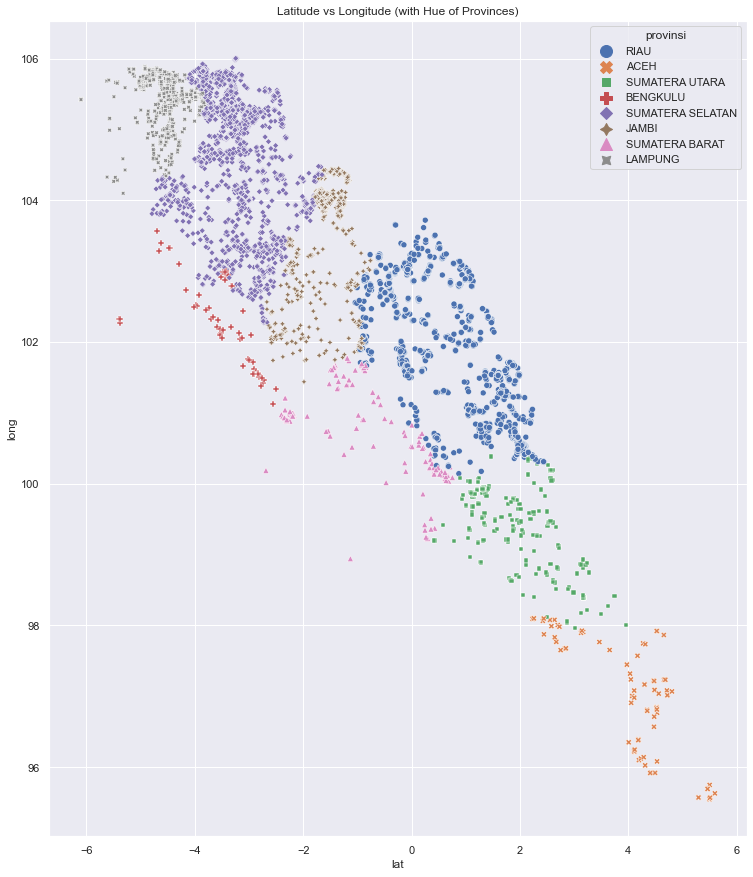

In [8]:
# seaborn plot
# Scatter Plot Lat and Long with Hue of Provinces
sns.set(rc={'figure.figsize':(12.5,15), 'legend.markerscale': 2.0})
sns.scatterplot(
    data=sumatera_only, x='lat', y='long', 
    hue='provinsi', 
    style='provinsi',
    )

plt.title("Latitude vs Longitude (with Hue of Provinces)")
plt.show()

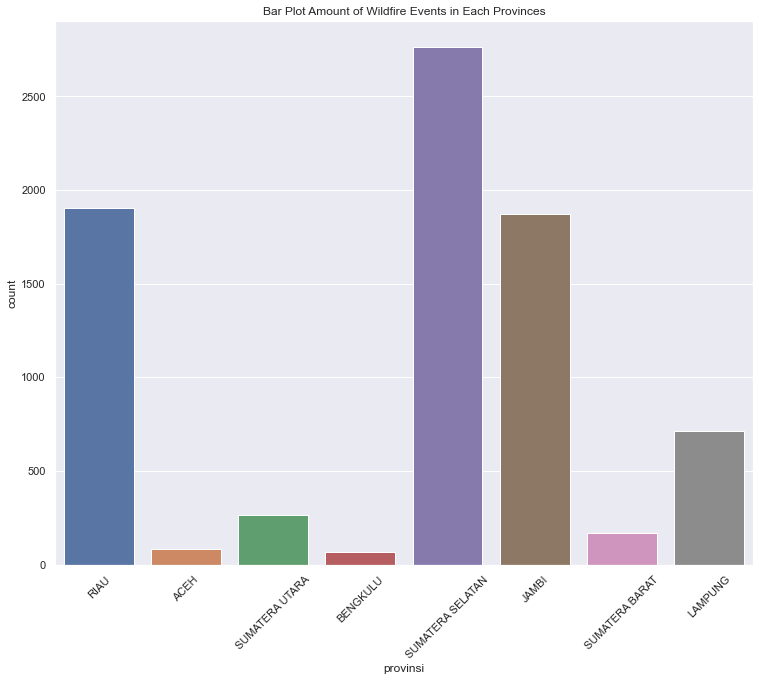

In [9]:
# Bar Plot Amount of Wildfire Events in Each Provinces
sns.set(rc={'figure.figsize':(12.5,10), 'legend.markerscale': 2.0})
sns.countplot(data=sumatera_only, x='provinsi')
plt.xticks(rotation=45)
plt.title("Bar Plot Amount of Wildfire Events in Each Provinces")
plt.show()

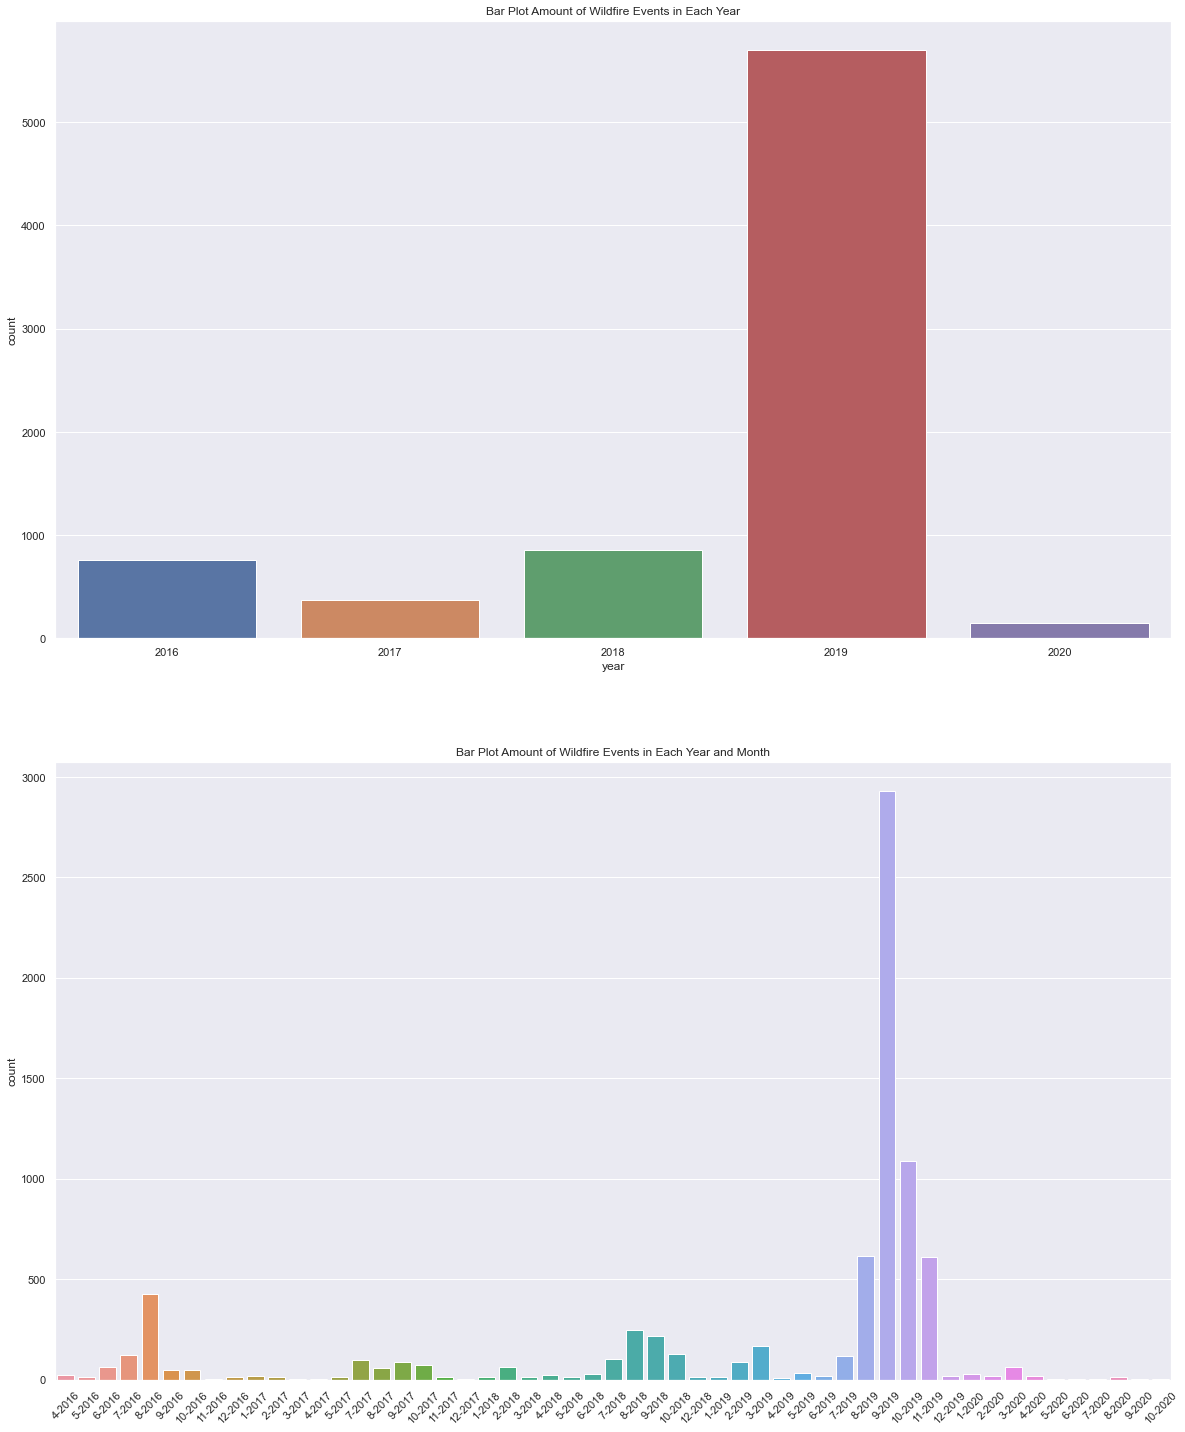

In [10]:
# Bar Plot Amount of Wildfire Events in each year, month, day

fig, ax = plt.subplots(nrows=2, figsize=(20,25))
# Bar Plot Amount of Wildfire Events in Each Year
sns.countplot(data=sumatera_only, x='year', ax=ax[0])
ax[0].set_title("Bar Plot Amount of Wildfire Events in Each Year")

# Bar Plot Amount of Wildfire Events in Each Year and Month
month_year = sumatera_only.month.map(lambda x: str(x))+'-'+sumatera_only.year.map(lambda x: str(x))
sns.countplot(data=sumatera_only, x=month_year, ax=ax[1])
ax[1].set_title("Bar Plot Amount of Wildfire Events in Each Year and Month")
plt.xticks(rotation= 45)
plt.show()


# Import earth engine API which is called ee


In [11]:
import ee
import folium
from folium import plugins

In [14]:
# Authenticate earth engine servers
ee.Authenticate()

#initialize API
ee.Initialize()

Enter verification code: 4/1AX4XfWgZV8eAOR-O3Md6NJ99RZtiOdT5-fq5gWBDqeimtBa6N32Szd8gLBc

Successfully saved authorization token.


# 7 Januari 2022 (Download data)

In [15]:
# black_list = [835, 1046]
# def download_from_url_link(url_list, folder_path):
#     """
#     Download file using based on array of urls from parameter url_list
#     """
#     for i in range(len(url_list)):
#         file_name = str(i)
#         file_path = os.path.join(folder_path, file_name)

#         if not os.path.exists(file_path):
#             print("Downloading...", file_name)
#             urllib.request.urlretrieve(url_list[i], file_path)

#     print('done')

# # sentinel 2 cloud masking 
# def s2CloudMasking(image):
#     qa = image.select('QA60')
#     # Bits 10 and 11 are clouds and cirrus, respectively.
#     cloudBitMask = 1 << 10
#     cirrusBitMask = 1 << 11

#     #Both flags should be set to zero, indicating clear conditions.
#     mask = qa.bitwiseAnd(cloudBitMask).eq(0)\
#              .And(qa.bitwiseAnd(cirrusBitMask).eq(0))

#     return image.updateMask(mask)\
#                 .divide(10000)\

# def get_sentinel_satellite_image_urls(satellite_name, situation, dataset, scale, file_format, folder_path):
#     url_list = []
    
#     for row in range(len(dataset)):
#         file_path = folder_path + f"\\{row}"
#         if os.path.exists(file_path):
#             print("data already exist")
#             continue
            
#         # Set coordinates
#         print(f"row {row} requesting...")
#         coordinates = [float(dataset.lat.values[row]), float(dataset.long.values[row])]
#         region = ee.Geometry.Rectangle([coordinates[1]-0.2, coordinates[0]-0.2, 
#                                         coordinates[1]+0.2, coordinates[0]+0.2]);


#         # filter image collection
#         # set base date
#         base_date = ee.Date(dataset.date.values[row])

#         # set geometry point
#         point = ee.Geometry.Point(dataset.long.values[row], dataset.lat.values[row])

#         # pre fire
#         prefire_date_start = ee.Date(base_date.advance(-365, 'day'))
#         prefire_date_end = ee.Date(base_date.advance(-1, 'day'))

#         # sentinel image pre wildfire event
#         prefire_collection = ee.ImageCollection(satellite_name)\
#                                    .filterDate(prefire_date_start, prefire_date_end)\
#                                    .filterBounds(region)\
#                                    .map(s2CloudMasking)\
#                                    .median()

#         # Calculate NBR for pre fire
#         pre_nbr = prefire_collection.normalizedDifference(['B8', 'B12'])


#         # post fire
#         postfire_date_start = ee.Date(base_date.advance(1, 'day'))
#         postfire_date_end = ee.Date(base_date.advance(365, 'day'))

#         # sentinel image post wildfire event
#         postfire_collection = ee.ImageCollection(satellite_name)\
#                                    .filterDate(postfire_date_start, postfire_date_end)\
#                                    .filterBounds(region)\
#                                    .map(s2CloudMasking)\
#                                    .median()

#         # Calculate NBR for post fire
#         post_nbr = postfire_collection.normalizedDifference(['B8', 'B12'])

#         # calculate delta NBR
#         delta_nbr = pre_nbr.subtract(post_nbr).rename('DELTA_NBR')
#         postfire_collection = postfire_collection.addBands(delta_nbr)
        
#         if situation == 'prefire':
#             download_url = prefire_collection.getDownloadURL({
#                 'region': region,
#                 'bands' : ['B12', 'B8', 'B4', 'B3', 'B2'],
#                 'scale' : scale,
#                 'format': file_format
#             })

#         else:
#             download_url = postfire_collection.getDownloadURL({
#                 'region': region,
#                 'bands' : ['DELTA_NBR', 'B12', 'B8', 'B4', 'B3', 'B2'],
#                 'scale' : scale,
#                 'format': file_format
#             })
        
#         print(f"download data from {row}...")
#         # download data form link
#         if row not in black_list:
#             urllib.request.urlretrieve(download_url, file_path)
#             continue
#         print(f"{row} downloaded")

# Download each band individually
def download_from_url_link(url_list, folder_path):
    """
    Download file using based on array of urls from parameter url_list
    """
    for i in range(len(url_list)):
        file_name = str(i)
        file_path = os.path.join(folder_path, file_name)

        if not os.path.exists(file_path):
            print("Downloading...", file_name)
            urllib.request.urlretrieve(url_list[i], file_path)

    print('done')

# sentinel 2 cloud masking 
def s2CloudMasking(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    #Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0)\
             .And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    return image.updateMask(mask)\
                .divide(10000)\

def download_image(download_url, folder_path, file_name):
    download_path = os.path.join(folder_path, file_name)
    print(f"download data from {download_path}...")
    urllib.request.urlretrieve(download_url, download_path)
    print(f"{download_path} downloaded")


def get_sentinel_satellite_image_urls(
        satellite_name, situation, 
        dataset, scale, file_format, 
        folder_path):
    
    url_list = []
    
    for row in range(len(dataset)):
        file_path = os.path.join(folder_path, str(row))
        if os.path.exists(file_path):
            print("data already exist")
        else:
            os.mkdir(file_path)
            
        os.chdir(file_path)
        print(os.getcwd())
        # Set coordinates
        coordinates = [float(dataset.lat.values[row]), float(dataset.long.values[row])]
        region = ee.Geometry.Rectangle([coordinates[1]-0.2, coordinates[0]-0.2, 
                                        coordinates[1]+0.2, coordinates[0]+0.2]);


        # filter image collection
        # set base date
        base_date = ee.Date(dataset.date.values[row])

        # set geometry point
        point = ee.Geometry.Point(dataset.long.values[row], dataset.lat.values[row])

        # pre fire
        prefire_date_start = ee.Date(base_date.advance(-365, 'day'))
        prefire_date_end = ee.Date(base_date.advance(-1, 'day'))

        # sentinel image pre wildfire event
        prefire_collection = ee.ImageCollection(satellite_name)\
                                   .filterDate(prefire_date_start, prefire_date_end)\
                                   .filterBounds(region)\
                                   .map(s2CloudMasking)\
                                   .median()

        # Calculate NBR for pre fire
        pre_nbr = prefire_collection.normalizedDifference(['B8', 'B12'])


        # post fire
        postfire_date_start = ee.Date(base_date.advance(1, 'day'))
        postfire_date_end = ee.Date(base_date.advance(365, 'day'))

        # sentinel image post wildfire event
        postfire_collection = ee.ImageCollection(satellite_name)\
                                   .filterDate(postfire_date_start, postfire_date_end)\
                                   .filterBounds(region)\
                                   .map(s2CloudMasking)\
                                   .median()

        # Calculate NBR for post fire
        post_nbr = postfire_collection.normalizedDifference(['B8', 'B12'])

        # calculate delta NBR
        delta_nbr = pre_nbr.subtract(post_nbr).rename('DELTA_NBR')
        postfire_collection = postfire_collection.addBands(delta_nbr)
        
        if situation == 'prefire':
            filenames= ['b12_b8','b4_b3','b2']
            bands =  [
                ['B12', 'B8'], 
                ['B4', 'B3'], 
                ['B2'],
                ]
            
            for i in range(len(filenames)):
                if filenames[i] not in os.listdir():
                    download_url = postfire_collection.getDownloadURL({
                        'region': region,
                        'bands' : bands[i],
                        'scale' : scale,
                        'format': file_format
                        }
                    )
                    
                    print(f"download data from {download_url}")
                    urllib.request.urlretrieve(download_url, filenames[i])
                    print(f"{download_url} downloaded")
                
                else:
                    print(f"{bands[i]} already exist")
                    
        else:
            filenames= ['dnbr_b12','b8_b4','b3_b2']
            bands =  [
                ['DELTA_NBR', 'B12'], 
                ['B8', 'B4'], 
                ['B3', 'B2'],
                ]

            for i in range(len(filenames)):
                if filenames[i] not in os.listdir():
                    download_url = postfire_collection.getDownloadURL({
                        'region': region,
                        'bands' : bands[i],
                        'scale' : scale,
                        'format': file_format
                        }
                    )

                    print(f"download data from {download_url}")
                    urllib.request.urlretrieve(download_url, filenames[i])
                    print(f"{download_url} downloaded")
                else:
                    print(f"{bands[i]} already exist")
            
            
#             # download .tiff files for dnbr and b12 bands
#             download_url = postfire_collection.getDownloadURL(
#                     {'region': region,
#                      'bands' : dnbr_b12,
#                      'scale' : scale,
#                      'format': file_format})
            
#             download_path = os.path.join(folder_path, 'dnbr_b12')
#             print(f"download data from {download_url}...")
#             urllib.request.urlretrieve(download_url, download_path)
#             print(f"{download_url} downloaded")
            
#             # download .tiff files for b8 and b4 bands
#             download_url=postfire_collection.getDownloadURL(
#                     {'region': region,
#                      'bands' : b8_b4,
#                      'scale' : scale,
#                      'format': file_format})
            
#             download_path = os.path.join(folder_path, 'b8_b4')
#             print(f"download data from {download_url}...")
#             urllib.request.urlretrieve(download_url, download_path)
#             print(f"{download_url} downloaded")
            
#             # download .tiff files for b3 and b2 bands
#             download_url=postfire_collection.getDownloadURL(
#                     {'region': region,
#                      'bands' : b3_b2,
#                      'scale' : scale,
#                      'format': file_format})
            
#             download_path = os.path.join(folder_path, 'b3_b2')
#             print(f"download data from {download_url}...")
#             urllib.request.urlretrieve(download_url, download_path)
#             print(f"{download_url} downloaded")
            
# #             download_url = postfire_collection.getDownloadURL({
# #                     'region': region,
# #                     'bands' : dnbr_b12_b8,
# #                     'scale' : scale,
# #                     'format': file_format
#             })
            
#             file_name = 'dnbr_b12_b8'
#             download_path = os.path.join(file_path, file_name)
#             print(f"download data from {row} {file_name}...")
#             urllib.request.urlretrieve(download_url, download_path)
#             print(f"{row} {file_name} downloaded")
            
#             download_url = postfire_collection.getDownloadURL({
#                     'region': region,
#                     'bands' : b4_b3_b2,
#                     'scale' : scale,
#                     'format': file_format
#             })
#             file_name = 'b4_b3_b2'
#             download_path = os.path.join(file_path, file_name)
#             print(f"download data from {row} {file_name}...")
#             urllib.request.urlretrieve(download_url, download_path)
#             print(f"{row} {file_name} downloaded")

In [16]:
# create folder fot .tiff files
D_DIR = "D:\\"

WILDFIRE_SUMATERA_DATASET_DIR = "wildfire-sumatera-dataset"
WILDFIRE_SUMATERA_GEOTIFF_DIR = "wildfire-sumatera-geotiff"

SENTINEL_DIR = "sentinel-2"

SENTINEL_PREFIRE_FOLDER = f"{D_DIR}\\{WILDFIRE_SUMATERA_DATASET_DIR}\\{WILDFIRE_SUMATERA_GEOTIFF_DIR}\\{SENTINEL_DIR}\\prefire"
SENTINEL_POSTFIRE_FOLDER = f"{D_DIR}\\{WILDFIRE_SUMATERA_DATASET_DIR}\\{WILDFIRE_SUMATERA_GEOTIFF_DIR}\\{SENTINEL_DIR}\\postfire"

if D_DIR is not os.getcwd():
    os.chdir(D_DIR)
    print(f"OS directory is changed to {D_DIR}")
    print(os.listdir())
    print(os.getcwd())
    
if WILDFIRE_SUMATERA_DATASET_DIR not in os.listdir():
    os.mkdir(WILDFIRE_SUMATERA_DATASET_DIR)
    print(f"{WILDFIRE_SUMATERA_DATASET_DIR} has been created")
else:
    os.chdir(D_DIR+WILDFIRE_SUMATERA_DATASET_DIR)
    print(f"{WILDFIRE_SUMATERA_DATASET_DIR} already exist")


OS directory is changed to D:\
['System Volume Information', 'Install SanDisk Software for Windows.exe', 'Install SanDisk Software for Mac.dmg', '$RECYCLE.BIN', 'wildfire-sumatera-dataset']
D:\
wildfire-sumatera-dataset already exist


In [17]:
# check whether the folder is exists
if not os.path.exists(SENTINEL_PREFIRE_FOLDER):
    os.makedirs(SENTINEL_PREFIRE_FOLDER)
    print(f"{SENTINEL_PREFIRE_FOLDER} has been successfully create")
else:
    print(f"{SENTINEL_PREFIRE_FOLDER} already exist")

if not os.path.exists(SENTINEL_POSTFIRE_FOLDER):
    os.makedirs(SENTINEL_POSTFIRE_FOLDER)
    print(f"{SENTINEL_POSTFIRE_FOLDER} has been successfully create")
else:
    print(f"{SENTINEL_POSTFIRE_FOLDER} already exist")

D:\\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:\\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist


In [ ]:
# get list of url path for downloading .tiff files
# get_sentinel_satellite_image_urls(satellite_name='COPERNICUS/S2',
#                                   situation='prefire',                                                                     
#                                   dataset=sumatera_only,
#                                   scale=60,
#                                   file_format='GeoTIFF',
#                                   folder_path=SENTINEL_PREFIRE_FOLDER)
# print("done")

get_sentinel_satellite_image_urls(
    satellite_name='COPERNICUS/S2',
    situation='postfire',
    dataset=sumatera_only,
    scale=50,
    file_format='GeoTIFF',
    folder_path=SENTINEL_POSTFIRE_FOLDER,
    )
print("done")

# print(sentinel_prefire_url_list)
# print(sentinel_postfire_url_list)


data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\0
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\s

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\50
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\51
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\52
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\53
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\54
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exi

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\101
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\102
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\103
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\104
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\105
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\150
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\151
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\152
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\153
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\154
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\196
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\197
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\198
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\199
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\200
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\246
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\247
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\248
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\249
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\250
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\294
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\295
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\296
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\297
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\298
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\340
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\341
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\342
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\343
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\344
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\391
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\392
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\393
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\394
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\395
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\438
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\439
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\440
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\441
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\442
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\492
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\493
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\494
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\495
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\496
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\545
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\546
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\547
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\548
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\549
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\599
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\600
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\601
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\602
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\603
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\651
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\652
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\653
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\654
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\655
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\698
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\699
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\700
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\701
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\702
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\747
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\748
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\749
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\750
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\751
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data alread

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\799
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\800
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\801
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\802
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\803
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\846
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\847
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\848
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\849
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\850
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\893
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\894
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\895
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\896
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\897
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\939
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\940
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\941
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\942
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\943
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\987
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\988
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\989
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\990
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\991
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1035
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1036
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1037
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1038
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1039
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1084
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1085
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1086
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1087
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1088
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-su

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1156
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1157
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1158
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1159
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1160
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1209
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1210
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1211
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1212
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1213
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1274
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1275
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1276
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1277
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1278
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1324
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1325
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1326
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1327
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1328
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1388
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1389
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1390
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1391
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1392
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1441
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1442
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1443
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1444
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1445
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1506
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1507
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1508
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1509
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1510
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1555
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1556
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1557
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1558
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1559
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1620
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1621
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1622
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1623
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1624
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1671
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1672
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1673
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1674
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1675
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1735
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1736
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1737
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1738
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1739
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\senti

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1785
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1786
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1787
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1788
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1789
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\senti

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1845
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1846
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1847
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1848
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1849
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1896
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1897
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1898
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1899
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1900
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1957
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1958
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1959
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1960
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\1961
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2007
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2008
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2009
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2010
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2011
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2073
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2074
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2075
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2076
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2077
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2119
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2120
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2121
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2122
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2123
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2175
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2176
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2177
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2178
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2179
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2225
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2226
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2227
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2228
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2229
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2290
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2291
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2292
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2293
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2294
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2343
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2344
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2345
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2346
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2347
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2410
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2411
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2412
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2413
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2414
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2455
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2456
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2457
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2458
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2459
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2507
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2508
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2509
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2510
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2511
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2567
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2568
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2569
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2570
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2571
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2612
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2613
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2614
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2615
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2616
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2664
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2665
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2666
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2667
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2668
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2734
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2735
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2736
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2737
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2738
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2779
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2780
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2781
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2782
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2783
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2831
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2832
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2833
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2834
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2835
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2901
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2902
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2903
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2904
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2905
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2946
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2947
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2948
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2949
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\2950
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3000
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3001
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3002
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3003
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3004
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3071
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3072
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3073
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3074
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3075
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3117
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3118
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3119
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3120
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3121
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\senti

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3170
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3171
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3172
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3173
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3174
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3231
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3232
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3233
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3234
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3235
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3281
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3282
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3283
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3284
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3285
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3349
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3350
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3351
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3352
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3353
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3393
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3394
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3395
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3396
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3397
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3444
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3445
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3446
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3447
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3448
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3512
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3513
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3514
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3515
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3516
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3564
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3565
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3566
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3567
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3568
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3631
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3632
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3633
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3634
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3635
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-su

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3684
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3685
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3686
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3687
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3688
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3750
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3751
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3752
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3753
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3754
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3802
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3803
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3804
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3805
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3806
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3870
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3871
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3872
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3873
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3874
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3914
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3915
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3916
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3917
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3918
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-su

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3965
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3966
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3967
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3968
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\3969
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4033
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4034
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4035
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4036
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4037
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\senti

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4078
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4079
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4080
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4081
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4082
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4129
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4130
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4131
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4132
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4133
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4197
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4198
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4199
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4200
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4201
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4241
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4242
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4243
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4244
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4245
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4307
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4308
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4309
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4310
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4311
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4358
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4359
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4360
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4361
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4362
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4418
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4419
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4420
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4421
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4422
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4464
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4465
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4466
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4467
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4468
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4523
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4524
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4525
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4526
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4527
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4568
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4569
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4570
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4571
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4572
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4624
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4625
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4626
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4627
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4628
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4671
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4672
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4673
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4674
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4675
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4730
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4731
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4732
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4733
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4734
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4778
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4779
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4780
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4781
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4782
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4842
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4843
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4844
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4845
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4846
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4889
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4890
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4891
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4892
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4893
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-su

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4949
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4950
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4951
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4952
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\4953
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5013
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5014
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5015
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5016
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5017
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5074
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5075
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5076
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5077
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5078
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5136
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5137
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5138
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5139
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5140
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\senti

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5200
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5201
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5202
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5203
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5204
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5248
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5249
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5250
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5251
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5252
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5305
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5306
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5307
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5308
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5309
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5351
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5352
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5353
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5354
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5355
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5410
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5411
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5412
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5413
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5414
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5457
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5458
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5459
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5460
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5461
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\senti

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5509
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5510
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5511
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5512
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5513
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5572
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5573
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5574
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5575
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5576
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5617
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5618
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5619
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5620
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5621
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5675
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5676
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5677
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5678
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5679
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5722
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5723
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5724
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5725
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5726
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5782
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5783
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5784
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5785
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5786
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5829
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5830
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5831
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5832
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5833
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5889
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5890
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5891
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5892
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5893
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5936
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5937
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5938
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5939
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5940
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5996
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5997
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5998
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\5999
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6000
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6043
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6044
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6045
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6046
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6047
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6102
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6103
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6104
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6105
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6106
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6149
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6150
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6151
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6152
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6153
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6209
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6210
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6211
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6212
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6213
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exis

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6256
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6257
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6258
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6259
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6260
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6317
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6318
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6319
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6320
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6321
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sum

['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6365
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6366
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6367
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6368
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6369
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-su

D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6425
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6426
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6427
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6428
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6429
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\senti

['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6473
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6474
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6475
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6476
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6477
['DELTA_NBR', 'B12'] already exist
['B8', 'B4'] already exist
['B3', 'B2'] already exist
data a

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/8d7915ee4bde4a786c2b163bc4f8f434-30287b0006bd56d0af45ea6a286444d6:getPixels downloaded
download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/00d54c5aea27b393166dc7294f2f60b0-fd71757463e6963fad812da4bcffa98b:getPixels
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/00d54c5aea27b393166dc7294f2f60b0-fd71757463e6963fad812da4bcffa98b:getPixels downloaded
download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/e3d3e0dc8f567989dd67b6aac13003b1-45ebb821824cbe0abfa7e5fab484526b:getPixels
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/e3d3e0dc8f567989dd67b6aac13003b1-45ebb821824cbe0abfa7e5fab484526b:getPixels downloaded
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6513
download data from https://earthengine.googleapis.com/v1alp

download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/dd59adb28e0dc5bcc72ec5a539b3f967-cd2bc91c0ab825e9997251a98d18f3f4:getPixels
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/dd59adb28e0dc5bcc72ec5a539b3f967-cd2bc91c0ab825e9997251a98d18f3f4:getPixels downloaded
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire\6520
download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/5fa9c39d87447a5eda6bef9a5a80d876-825efcaa4393a4bce200adf4d390a8fd:getPixels
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/5fa9c39d87447a5eda6bef9a5a80d876-825efcaa4393a4bce200adf4d390a8fd:getPixels downloaded
download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/59783807d8163294f13f87228fd0805c-a7ebbddaf79136ece9133a900618ebf2:getPixels
https://earthengine.googleapis.com/v1alpha/projects

download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/dfb5855a0e4c9a2e704a53fc3ed3bb1f-16a99f57841693724263d127beabf35f:getPixels
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/dfb5855a0e4c9a2e704a53fc3ed3bb1f-16a99f57841693724263d127beabf35f:getPixels downloaded
download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/f2be7985ca1b729f0c7e68ab85a4349b-767a48fe7397d9b03339c76aec0a4a84:getPixels
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/f2be7985ca1b729f0c7e68ab85a4349b-767a48fe7397d9b03339c76aec0a4a84:getPixels downloaded
download data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/6170d5c7a49e4d42947f6d3896cc8323-27e9738e4e357756874ee9b9ea56a3fb:getPixels
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/6170d5c7a49e4d42947f6d3896cc8323-27e9738e4e357756

# 1664 -> ganti jadi scale 60
# 2282 -> ganti jadi 6 band

In [ ]:
# def get_filename(url):
#     """
#     Parses filename from given url
#     """
#     if url.find('/'):
#         temp = url.rsplit('/', 1)[1]
#         return temp.rsplit(':', 1)[0]
    
    
def download_from_url_link(url_list, folder_path):
    """
    Download file using based on array of urls from parameter url_list
    """
    for i in range(len(url_list)):
        file_name = str(i)
        file_path = os.path.join(folder_path, file_name)

        if not os.path.exists(file_path):
            print("Downloading...", file_name)
            urllib.request.urlretrieve(url_list[i], file_path)

    print('done')

